<a href="https://colab.research.google.com/github/vatsalvasani/CE155_ML/blob/main/LAB%205/CE155_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB :- 5
## Exercise : 1

**Step 1: Import necessary libraries.**

In [ ]:

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

**Step 2: Prepare dataset.**

In [ ]:

#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

**Step 3: Digitize the data set using encoding**

In [ ]:


le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")

print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


**Step 4: Merge different features to prepare dataset and split dataset into train-test**


In [ ]:

# Merge different features

features=tuple(zip(Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded))
print("Features:",features)

# Split dataset into train-test
X = features
Y = Play
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5 , random_state = 10)

Features: ((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))


**Step 5: Train ’Create and Train DecisionTreeClassifier’**

In [ ]:
# Create a Decision Tree Classifier (using Entropy)

# Decision tree with entropy
clf_entropy = DecisionTreeClassifier()

# Train the model using the training sets
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predict Output
y_pred = clf_entropy.predict(X_test)
print(y_pred)

['No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No']


**step 6 : Calculate Accuracy and Confusion Matrix**

In [ ]:
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print ("Accuracy : \n",accuracy_score(y_test,y_pred)*100)

Confusion Matrix: 
 [[1 0]
 [2 4]]
Accuracy : 
 71.42857142857143


**Step 7: Display Decsion Tree Created**

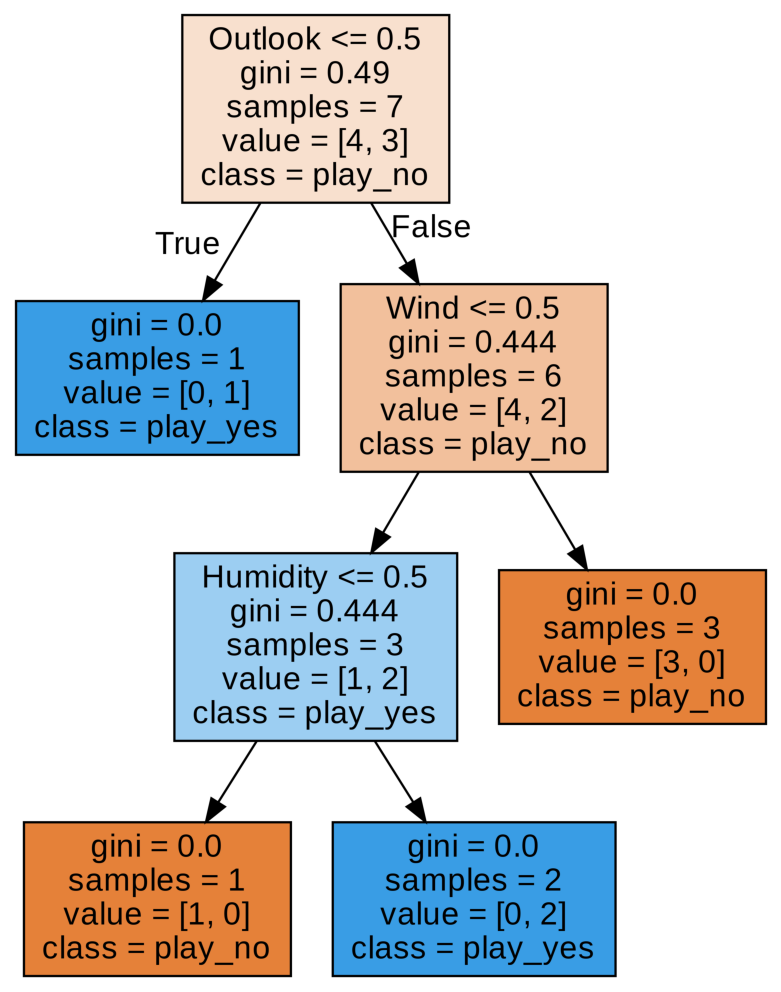

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(clf_entropy,out_file='tree_entropy.dot',feature_names=['Outlook','Temperature','Humidity','Wind'],class_names=['play_no','play_yes'],filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();